[800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800. 800. 800. 800. 763. 240. 800. 800. 800. 800. 800. 800.
 800. 800.]
20
[6560. 6560. 6560. 6560. 6560. 6560. 6560. 6560. 6560. 6560. 6560. 6391.
 6222. 5123. 5165. 5165. 4277. 4827. 4482. 4651.  495. 2080. 6560. 6560.
 6560. 6560. 6560. 6560. 6560. 6560.]
19
[39120. 39204. 39120. 41103. 39077. 41271. 42539. 44979. 46421. 47052.
 40843. 38078. 34117. 28146. 27629. 20475. 20915. 15974. 19387.  8352.
 24728. 13688. 52640. 52640. 52640. 52640. 52640. 52640. 16800. 16800.]
14
[249850. 243072. 251801. 255859. 252992. 260708. 273060. 295193. 292426.
 300718. 225247. 136541.  85608.  86129.  64260.  64624.  47739.  62051.
  55416.    720.  57048. 225920. 421280. 391520. 399648. 421280. 399648.
 380704.  27040.  27040.]
10
[1337659. 1270590. 1345198. 1336552. 1550359. 1429780. 1458749. 1544112.
 1239895. 1168004.  667283.  473065.  298656.  173727.  138629.  144606.
  135322.  141965.   63382.  498936.  104480.

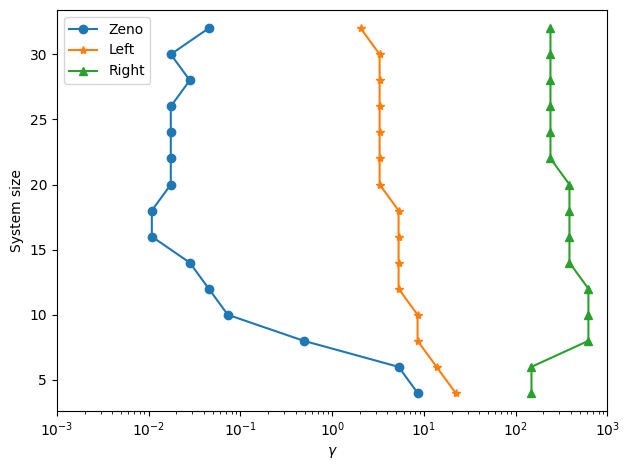

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pickle

L_list = range(4, 34, 2)
zeno_transitions = []
left_transitions = []
right_transitions = []
for L in L_list:
    filename = f"results_{L}.pickle"
    with open(filename, 'rb') as f:
        results = pickle.load(f)
    # (gammas, metric, time)
    results = np.array(results)
    costs = results[:, 0, -1]
    print(costs)
    gammas = np.logspace(-3, 3, 30)

    # First drop off
    zeno_costs = results[:, 1, 49]
    for j, cost in enumerate(zeno_costs):
        if j == 0:
            temp_cost = cost
        elif cost < 0.8*temp_cost:
            zeno_transition = gammas[j-2]
            print(j-1)
            break

    left_gammas = gammas[0:25]
    left_transition = left_gammas[np.argmin(costs[0:25])]
    right_gammas = gammas[25:29]
    right_transition = right_gammas[np.argmin(costs[25:29])]
    zeno_transitions.append(zeno_transition)
    left_transitions.append(left_transition)
    right_transitions.append(right_transition)

plt.plot(zeno_transitions, L_list, marker='o', linestyle='-', label="Zeno")
plt.plot(left_transitions, L_list, marker='*', linestyle='-', label="Left")
plt.plot(right_transitions, L_list, marker='^', linestyle='-', label="Right")

plt.legend()
# Plot formatting
plt.xscale('log')
plt.xlim(1e-3, 1e3)
plt.ylabel("System size")
plt.xlabel("$\\gamma$")
plt.savefig("transitions.pdf", dpi=300)
plt.tight_layout()
plt.show()